# Assignment 2 - Descriptive statistics
Probability and Statistics<br>
2020<br>
Andrey Verbovskiy<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

In [2]:
# Import libraries
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read the example data
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
sep = ","
data = pd.read_csv(file, sep, header = None)
data.columns = ['age', 'sex','chest_pain_type','resting_blood_pressure', 'serum_cholesterol','fasting_blood_sugar', 
                'resting_ecg','max_heart_rate','exercise_angina','oldpeak','slope_st_segment','number_of_vessels','thal','heart_disease']



Information about the data: https://www.kaggle.com/ronitf/heart-disease-uci

## Problem 1
Using the example data compare the `age` data for men and women. 

- Calculate the descriptive statistics of age for both groups (men and women).
- Plot the age distribution (=histogram) for both groups (men and women). Pay special attention for the bins settings.

Compare the distributions and the statistical values between the groups.
- How many datapoints there are on each group (men and women)?
- What are the highest and lowest values for each group?
- How much do the mean values differ between men and women?
- Explain on your own words what similarities and differences there are in the age distributions between men and women in this dataset.

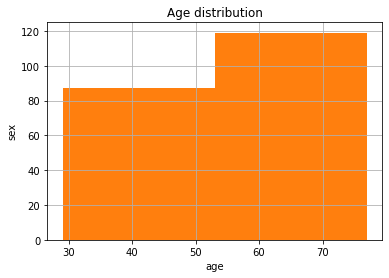

In [4]:
# Your code
groups = data.groupby('sex')
groups['age'].describe()  #describe was used to collect data about mean,min,max,count
groups['age'].std()

groups['age'].hist(bins=2)
plt.xlabel('age')
plt.ylabel('sex')
plt.title('Age distribution')
show()

In [5]:
groups.describe()

age                                                      \
     count       mean       std   min   25%   50%    75%   max   
sex                                                              
0.0   97.0  55.721649  9.370546  34.0  50.0  57.0  63.00  76.0   
1.0  206.0  53.834951  8.836838  29.0  47.0  54.5  59.75  77.0   

    chest_pain_type            ... slope_st_segment      heart_disease  \
              count      mean  ...              75%  max         count   
sex                            ...                                       
0.0            97.0  3.144330  ...              2.0  3.0          97.0   
1.0           206.0  3.165049  ...              2.0  3.0         206.0   

                                                  
         mean       std  min  25%  50%  75%  max  
sex                                               
0.0  0.536082  1.041452  0.0  0.0  0.0  1.0  4.0  
1.0  1.126214  1.266296  0.0  0.0  1.0  2.0  4.0  

[2 rows x 88 columns]

**Your answers**

a) female:97  male:206

b)female: min = 34.0 max = 76.0   male: min = 29.0  max = 77.0

c)55.721649 - 53.834951 = 1.8866980000000027

d)male result are much more diverse, their max values ar almost the same, yet min values differ significantly.

## Problem 2

Study the *resting blood pressure* values. Group the data by the *chest pain type*.

Coding:
- Find out the mean, standard deviation, min, max, and [quartile values](https://en.wikipedia.org/wiki/Quartile) for the *resting blood pressure* for each group.
- Create a histogram for the *resting blood pressure* for each group. Pay special attention to the bins settings.
- Create a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for the *resting blood pressure* for each group.

Questions:
- How many *outliers* are there for the each group?
- Which one of the groups have the lowest mean value?
- How easy it is to see the differences between the groups in the histograms?
- Is histogram or boxplot easier to see the differences between the groups in this case? Explain why in your own words.

Tip:
- You can use the *resting blood pressure* as `column` and the *chest pain type* as `by` parameter in boxplotting.
- You might also need to expand the figure size (see `figsize` parameter in boxplot documentation).

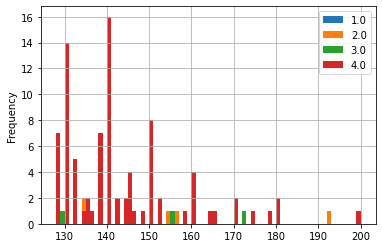

In [6]:
# Your code
data.describe()
groups2 = data.groupby('chest_pain_type')
groups2.describe()
rbp = groups2['resting_blood_pressure']
rbp.describe()
data.groupby('chest_pain_type')['resting_blood_pressure'].plot.hist(bins = np.arange(128.0, 201.0, 1.0))
plt.legend()
plt.grid()
plt.show()

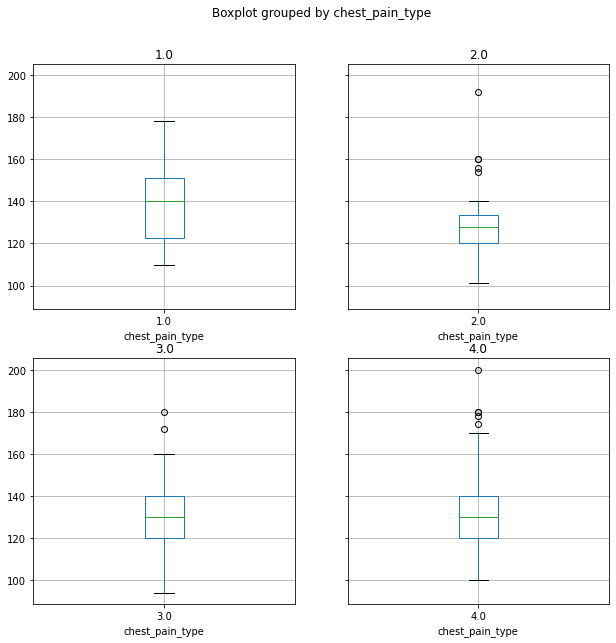

In [7]:
rbp.describe()
boxplot = groups2.boxplot(column = 'resting_blood_pressure', by = 'chest_pain_type', figsize = [10,10])

plt.show()

In [21]:
#finding outliers in other way (iloc???)
rbp.quantile([0.25,0.75])

# Q3-Q1

a = 151.0 - 122.5
b = 133.5 - 120.0
c = 140.0 - 120.0
d = 140.0 - 120.0

# IQR * 1.5

a = a * 1.5
b = b * 1.5
c = c * 1.5
d = d * 1.5

#lower limit (Q1 - 1.5IQR)

a1 = 122.5 - a
b1 = 120.0 - b
c1 = 120.0 - c
d1 = 120.0 - d

#upper limit (Q3 + 1.5IQR)

a2 = 151.0 + a
b2 = 133.5 + b
c2 = 140.0 + c
d2 = 140.0 + d

#looking for outliers


rbp.describe()


,count,mean,std,min,25%,50%,75%,max
chest_pain_type,,,,,,,,
1.0,23.0,140.869565,19.573415,110.0,122.5,140.0,151.0,178.0
2.0,50.0,128.400000,15.837182,101.0,120.0,128.0,133.5,192.0
3.0,86.0,130.290698,16.548585,94.0,120.0,130.0,140.0,180.0
4.0,144.0,132.201389,18.102884,100.0,120.0,130.0,140.0,200.0


# **Answers**:

a) group 1: 0 , group 2: 4 , group 3: 2 , group 4: 4

b)2

c)it is pretty hard, as amount of samples in each group is different. Group 4 has much more data pieces than the rest and it litterally makes it almost impossible to see the histograms of the rest of the groups.

d)Boxplot picute is more clear if you are familiar with its concept, yet for a stranger, who has no clue about how it works, the histogram will be much more clear. Yet, the difference between group 4 and the rest is much more clear in histogram. 

## Problem 3
Compare the *serum cholesterol* to the *resting blood pressure*.

Coding:
- Create a scatter-plot where *fasting blood sugar* is in the x-axis and *serum cholesterol* in y-axis.
- Count how many percentage of the datapoints have *serum cholesterol* higher than 350 mg/ml.
- Count how many percentage of the datatpoints have *resting blood pressure* higher than 190 mmHg.

Questions:
- By studying the graph evaluate if there are any outliers. Explain in your own words which are the outliers and why.
- How strongly the *fasting blood sugar* and *serum cholesterol* are associated? Explain why in your own words.

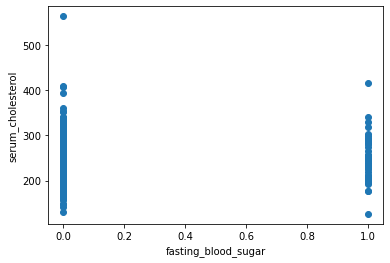

In [23]:
# Your code
plt.scatter(data['fasting_blood_sugar'], data['serum_cholesterol'])
plt.xlabel('fasting_blood_sugar')
plt.ylabel('serum_cholesterol')
plt.show()
data['serum_cholesterol'].count() # 303 in total
(data['serum_cholesterol'] >350).sum()  # 8 values

perc = 800/303  #2.6402640264026402%


data['resting_blood_pressure'].count()  # 303 in total
(data['resting_blood_pressure'] >190).sum() # 2 values

perc1 = 200/303 # 0.6600660066006601%


In [28]:
#finding outliers

data['serum_cholesterol'].describe()

#Q3 - Q1

a = 275 - 211

# IQR * 1.5

a = a * 1.5

#lower limit (Q1 - 1.5IQR)

a1 = 211 - a

#upper limit (Q3 + 1.5IQR)

a2 = 275 + a

# searching for outliers

(data['serum_cholesterol'] <a1).sum()  # 0 outliers below the lower limit
(data['serum_cholesterol'] >a2).sum()  # 5 outliers above upper limit


5

**Answers**:

a)there are around 4 outliers judging from the scatter as these three points are placed too far from the rest, however in reality (judging from the calculations above) there are 5 outliers above the upper limit and 0 below the lower limit.

b)according to my knowledge fasting blood sugar leads to many illnesses like serum cholesterol, which means that they are actually associated. By looking at the scatter plot we can see, that values got separated on two groups 0 and 1.